In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})

%matplotlib inline

In [2]:
df1 = pd.read_excel('iphoneX_201706.xlsx')
df2 = pd.read_excel('iphoneX_201806.xlsx')

df = pd.concat((df1, df2.drop(['城市'], axis=1)), axis=1)
df['同比增长'] = (df['2018年6月']-df['2017年6月'])/df['2017年6月']
df

,城市,2017年6月,2018年6月,同比增长
0,北京,491,307,-0.374745
1,重庆,648,307,-0.526235
2,西安,352,933,1.650568
3,郑州,596,523,-0.122483
4,苏州,918,275,-0.700436
5,西宁,842,252,-0.700713
6,济南,502,369,-0.264940
7,天津,62,903,13.564516
8,广州,141,40,-0.716312
9,深圳,338,303,-0.103550


<font color=blue>指标：销量  
维度：地区、时间</font>

In [3]:
# 查看描述性统计
df.describe()

,2017年6月,2018年6月,同比增长
count,10.000000,10.000000,10.000000
mean,489.000000,421.200000,1.170567
std,276.998997,287.233857,4.409915
min,62.000000,40.000000,-0.716312
25%,341.500000,282.000000,-0.656885
50%,496.500000,307.000000,-0.319843
75%,635.000000,484.500000,-0.108284
max,918.000000,933.000000,13.564516


Text(0.5,1,'2018年6月概率分布')

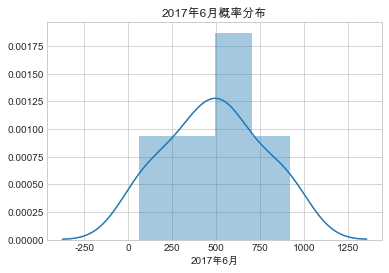

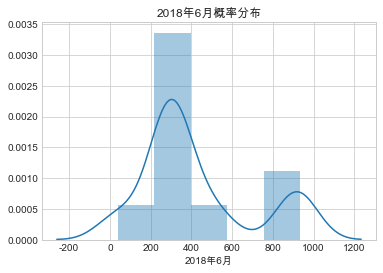

In [4]:
# 产看数据概率分布
plt.figure()
sns.distplot(df['2017年6月'])
plt.title('2017年6月概率分布')
plt.figure()
sns.distplot(df['2018年6月'])
plt.title('2018年6月概率分布')

<font color=blue>1、可以看到，2017年6月数据概率分布基本呈正态分布，2018年6月数据分布基本呈双峰分布</font>

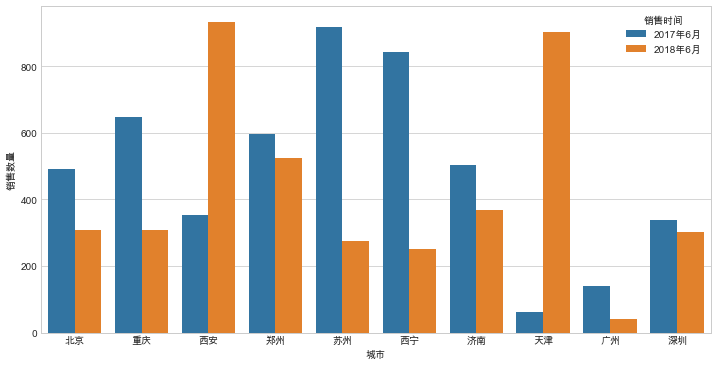

In [5]:
# 生成新列销售时间
df_1 = pd.DataFrame()
df_1['城市'] = df1['城市']
df_1['销售数量'] = df1['2017年6月']
df_1['销售时间'] = '2017年6月'

df_2 = pd.DataFrame()
df_2['城市'] = df2['城市']
df_2['销售数量'] = df2['2018年6月']
df_2['销售时间'] = '2018年6月'

df_3 = pd.concat((df_1, df_2), axis=0)

# 按时间维度绘制柱形图
plt.figure(figsize=(12,6))
sns.barplot(x='城市', y='销售数量', hue='销售时间', data = df_3)

<font color=blue>2、从时间维度上来看除了西安，天津之外，iphoneX的总体销量呈下降趋势</font>

Text(0.5,1,'2018年6月iphoneX销售情况')

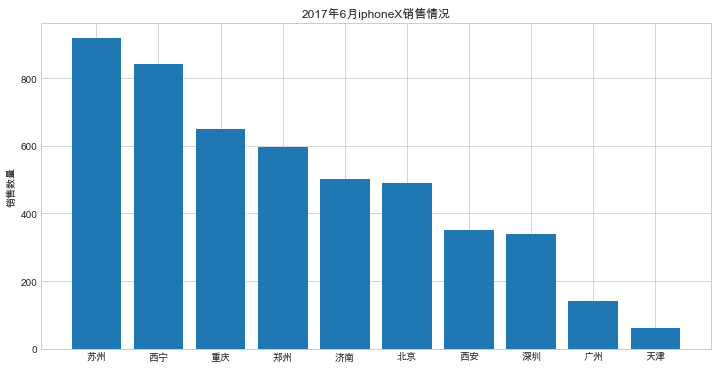

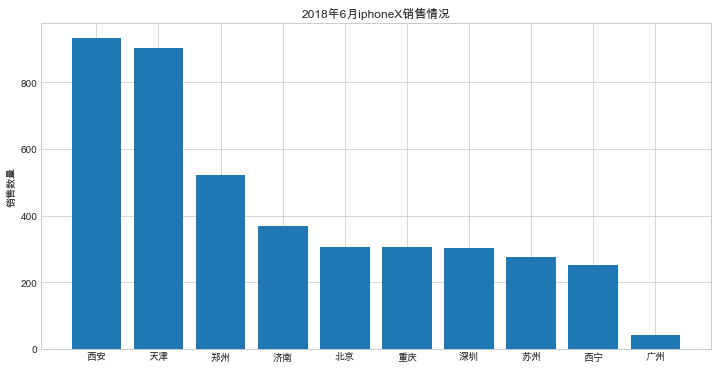

In [6]:
# 同一时间维度对比销量情况,按销量排序
df_1 = df_1.sort_values(by='销售数量',ascending=False).reset_index(drop=True)
df_2 = df_2.sort_values(by='销售数量',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,6))
x = df_1['城市']
y = df_1['销售数量']
plt.xticks(np.arange(len(x)), x)
plt.bar(np.arange(len(x)),y)
plt.ylabel('销售数量')
plt.title('2017年6月iphoneX销售情况')

plt.figure(figsize=(12,6))
x = df_2['城市']
y = df_2['销售数量']
plt.xticks(np.arange(len(x)), x)
plt.bar(np.arange(len(x)),y)
plt.ylabel('销售数量')
plt.title('2018年6月iphoneX销售情况')

<font color=blue>3、可以看到销售排名发生了变化  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2017年6月苏州、西宁销量最好  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2018年6月天津、西安销量最好</font>

<Container object of 10 artists>

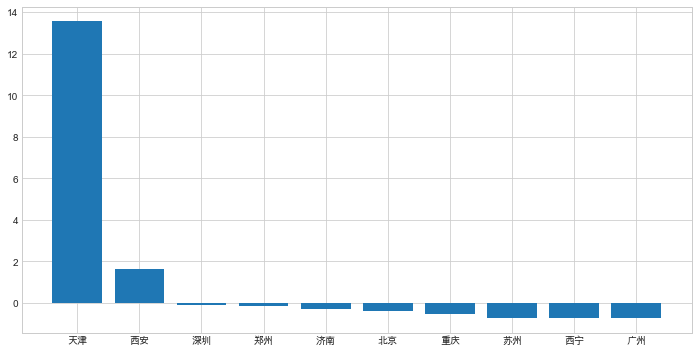

In [7]:
dff = df.sort_values(by='同比增长',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,6))
x = dff['城市']
y = dff['同比增长']
plt.xticks(np.arange(len(x)), x)
plt.bar(left=np.arange(len(x)), height=y)

<font color=blue>4、天津的销量同比增长远远高于西安，深圳最为稳定</font>

In [8]:
# 2017年总销量
print('2017年总销量:', df['2017年6月'].sum())
# 2018年总销量
print('2018年总销量:', df['2018年6月'].sum())

2017年总销量: 4890
2018年总销量: 4212


<font color=blue>5、从总体销量情况来看，销量呈下降趋势</font>

In [9]:
# 在时间维度上卷，将城市划分为一线城市、二三线城市（因为这里只有西宁一个三线城市，故不做单独处理）
df_4 = df
df_4['城市'].replace(['北京', '广州', '深圳'], ['一线城市', '一线城市', '一线城市'], inplace=True)
df_4['城市'].replace(['重庆', '西宁', '西安', '郑州', '苏州', '济南', '天津'], 
                   ['二三线城市', '二三线城市', '二三线城市', '二三线城市', '二三线城市', '二三线城市', '二三线城市'], inplace=True)
df_4.drop(['同比增长'], axis=1, inplace=True)
# 求和
df_5 = df_4.groupby(['城市']).sum()
df_5

,2017年6月,2018年6月
城市,,
一线城市,970,650
二三线城市,3920,3562


In [10]:
# 均值
df_6 = df_4.groupby(['城市']).mean()
df_6

,2017年6月,2018年6月
城市,,
一线城市,323.333333,216.666667
二三线城市,560.000000,508.857143


In [11]:
# 中位数
df_7 = df_4.groupby(['城市']).median()
df_7

,2017年6月,2018年6月
城市,,
一线城市,338,303
二三线城市,596,369


,城市,2017年6月,2018年6月
1,二三线城市,648,307
2,二三线城市,352,933
3,二三线城市,596,523
4,二三线城市,918,275
5,二三线城市,842,252
6,二三线城市,502,369
7,二三线城市,62,903


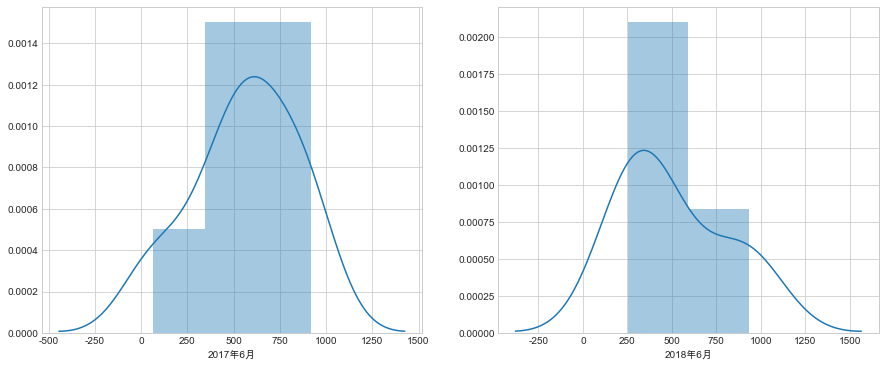

In [12]:
df_8 = df_4[df_4['城市'] == '二三线城市']
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(121)
sns.distplot(df_8['2017年6月'])
fig.add_subplot(122)
sns.distplot(df_8['2018年6月'])
df_8

,城市,2017年6月,2018年6月
0,一线城市,491,307
8,一线城市,141,40
9,一线城市,338,303


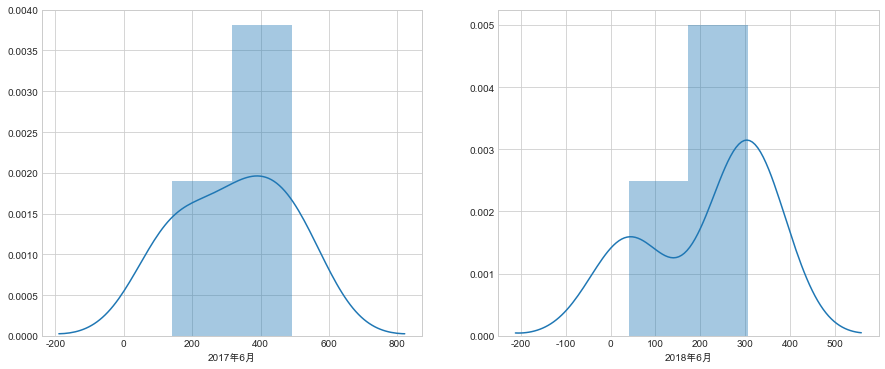

In [13]:
df_9 = df_4[df_4['城市'] != '二三线城市']
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(121)
sns.distplot(df_9['2017年6月'])
fig.add_subplot(122)
sns.distplot(df_9['2018年6月'])
df_9

<font color=blue>6、一线城市的总体销售情况大幅度下降，而二线城市只有小幅下降  
7、从购买力上来看，二三线城市是主力军，而一线城市的购买人数并不是很多  
8、一线城市的总体购买情况波动不大，而不同的二线城市却出现了很大的波动（中位数发生变化，概率分布由右偏变为左偏）</font>